In [2]:
# import libraries
import pandas as pd
import polars as pl
import numpy as np
import scipy.stats as stats


import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date

#import functime as ft

In [3]:
df = (
    pl.read_parquet("df_point_of_sale_adj_oos.parquet")
)

FileNotFoundError: No such file or directory (os error 2): df_point_of_sale_adj_oos.parquet

In [ ]:
list_of_ids = df.select(pl.col('id').unique()).sample(15).to_series()

In [ ]:
df_plot = df.filter(pl.col('id').is_in(list_of_ids))

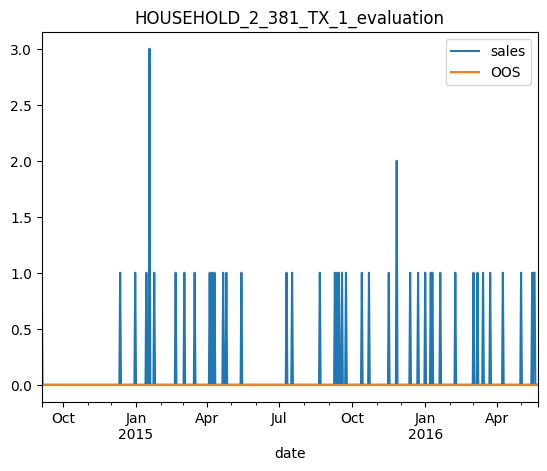

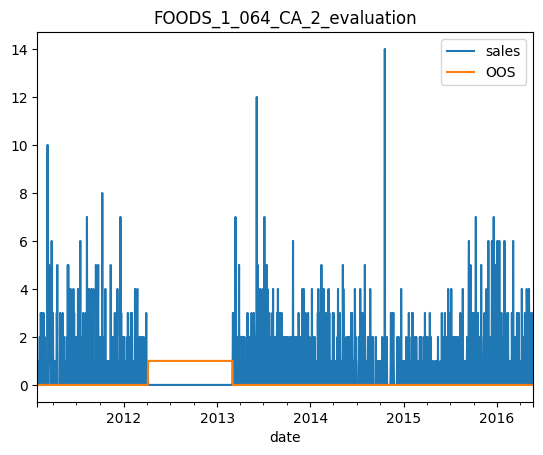

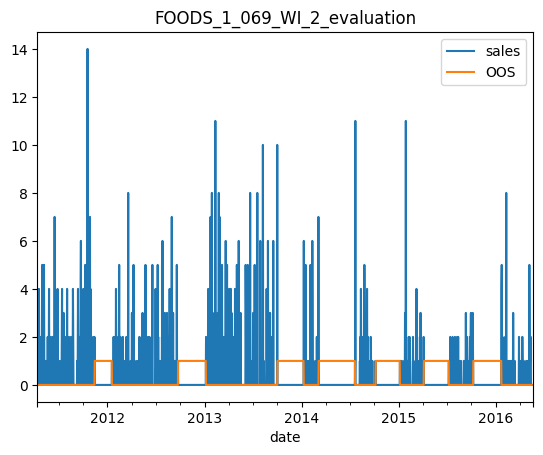

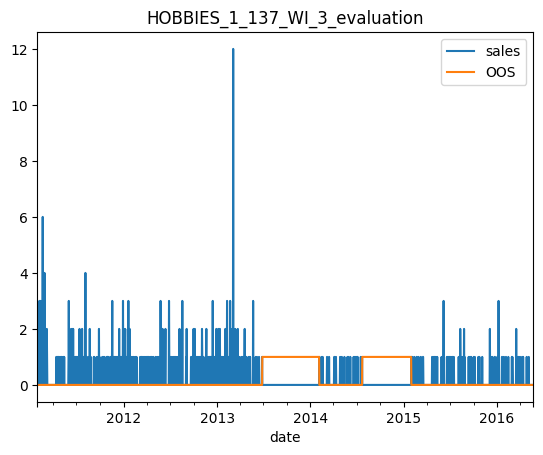

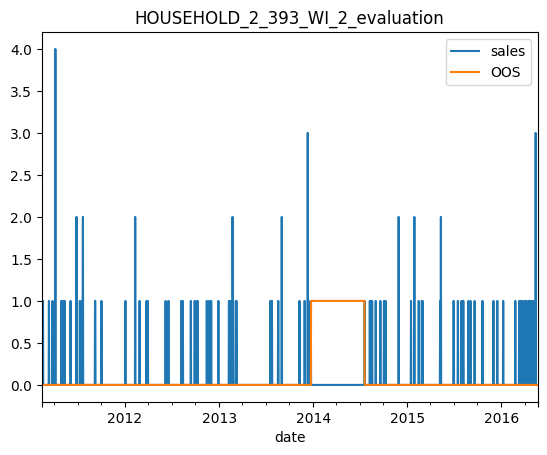

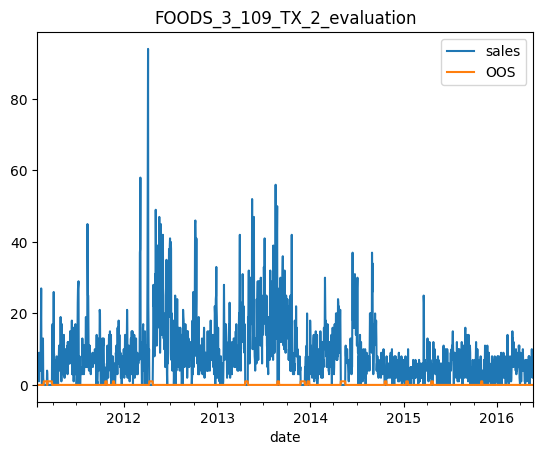

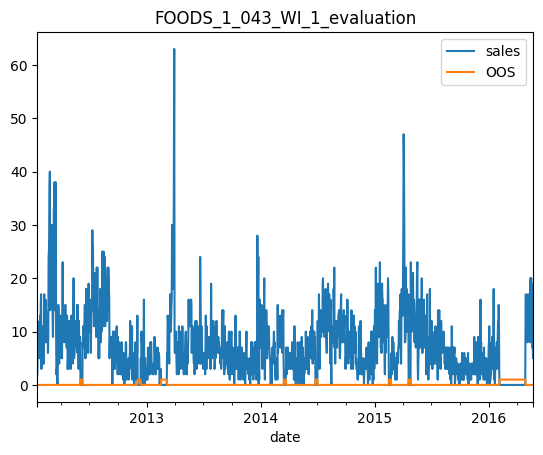

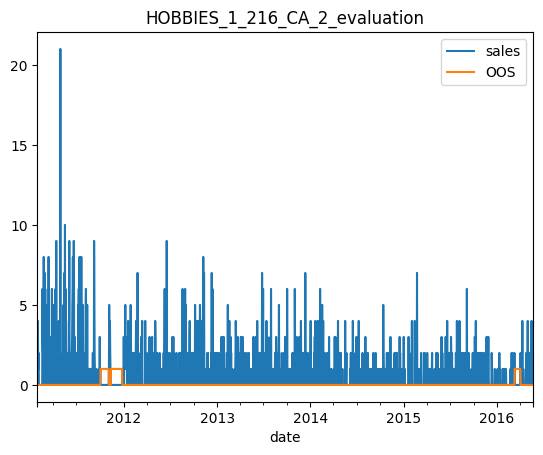

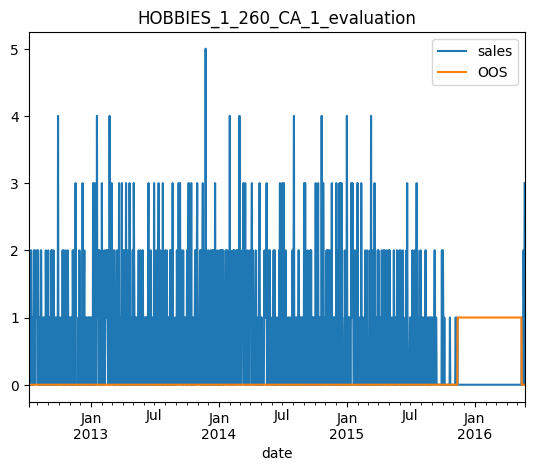

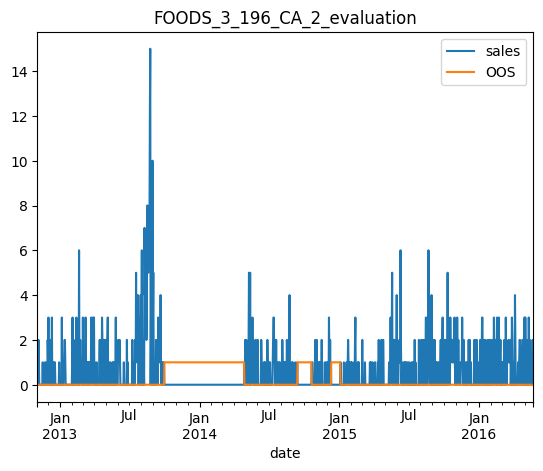

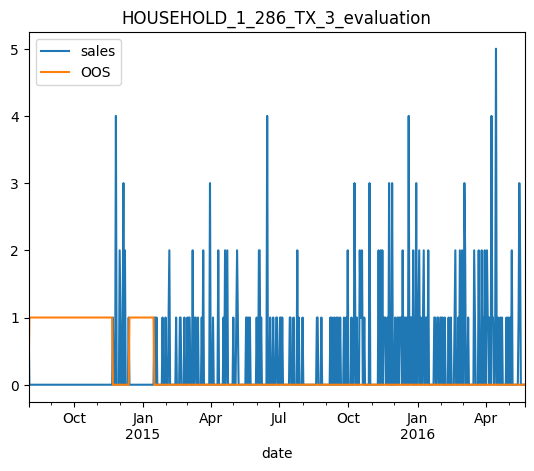

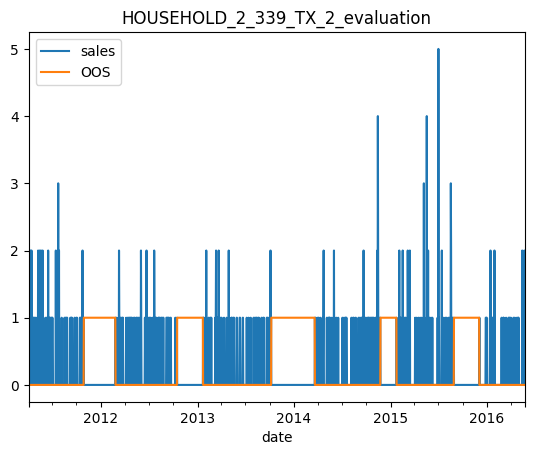

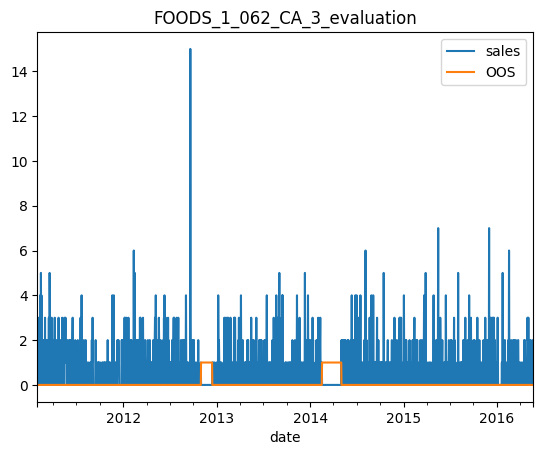

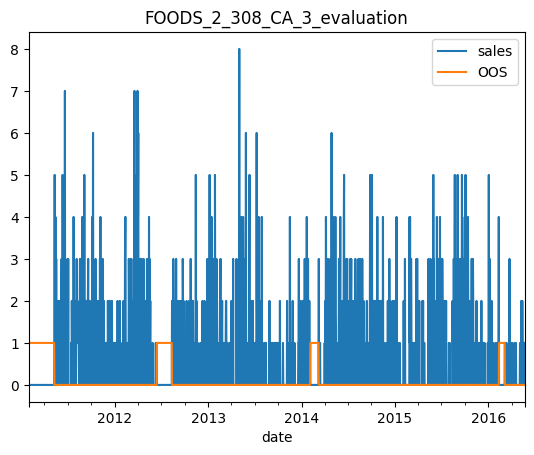

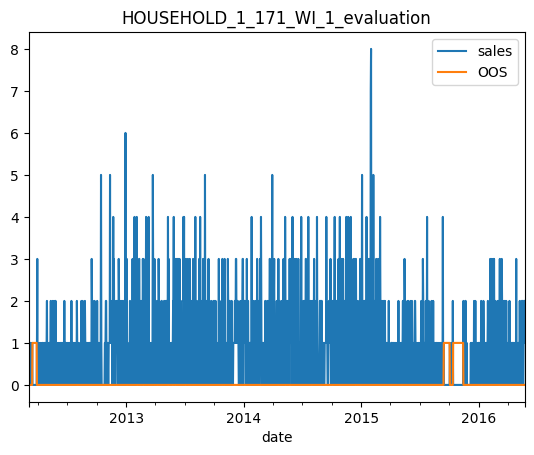

In [ ]:
for idx in list_of_ids:
    df_plot.filter(pl.col('id')==idx).to_pandas().plot(x='date', y=['sales','OOS'])
    plt.title(idx)


In [ ]:
df_plot.with_columns(

   rolling_std = pl.col('sales').rolling_std(window_size=7).over(pl.col('id')) ,

)

id,date,sales,zero_sales_ind,OOS,rolling_std
str,date,i16,i32,i32,f64
"""FOODS_2_080_CA…",2011-01-29,2,0,0,null
"""HOBBIES_1_356_…",2011-01-29,4,0,0,null
"""FOODS_2_066_CA…",2011-01-29,1,0,0,null
"""FOODS_3_230_CA…",2011-01-29,8,0,0,null
"""FOODS_2_066_TX…",2011-01-29,1,0,0,null
"""FOODS_3_819_TX…",2011-01-29,9,0,0,null
"""FOODS_2_080_CA…",2011-01-30,1,0,0,null
"""HOBBIES_1_356_…",2011-01-30,1,0,0,null
"""FOODS_2_066_CA…",2011-01-30,0,1,0,null


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0050dca7-17b3-44cb-a063-ab0f7808e424' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>